## Load Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset (assigning column names manually)
data_df = pd.read_csv('twitter_training.csv', header=None, names=['id', 'platform', 'sentiment', 'text'])

# Step 2: Inspect the first few rows to understand the data
print(data_df.head())



     id     platform sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [3]:
print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74682 non-null  int64 
 1   platform   74682 non-null  object
 2   sentiment  74682 non-null  object
 3   text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None


## Visualize the initial Data

C:\Users\user\AppData\Local\Temp\ipykernel_3340\749425732.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_counts.index, y=platform_counts.values, palette="viridis")


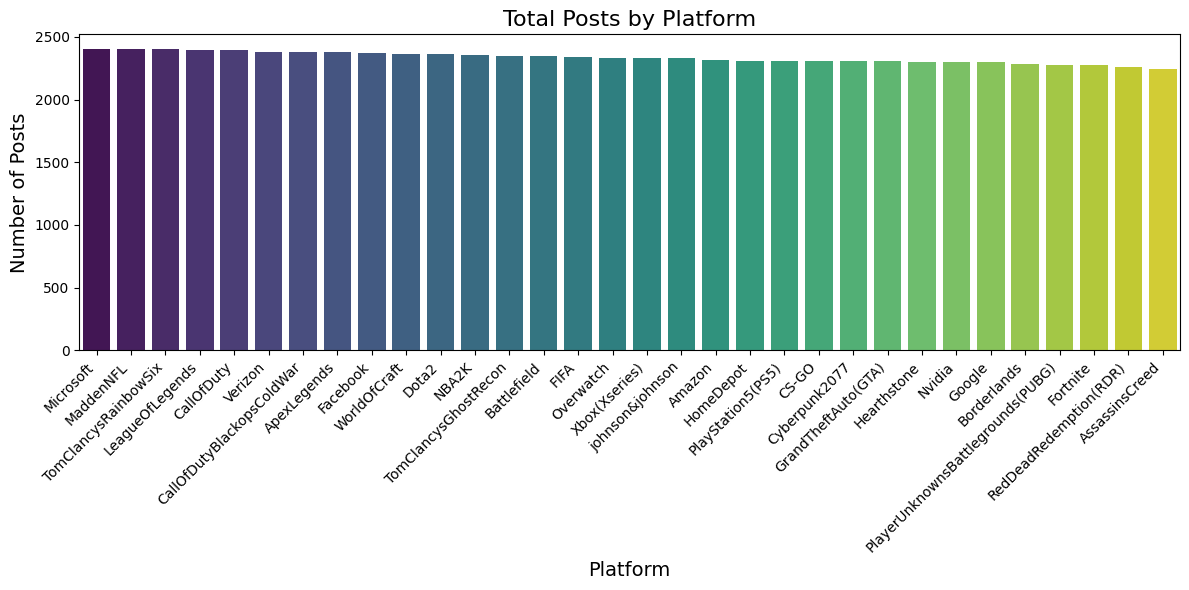

In [4]:
#  Count the number of posts by platform
platform_counts = data_df['platform'].value_counts()

#  Visualize the counts using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette="viridis")

# Add labels and title
plt.title('Total Posts by Platform', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate platform names for better visibility

# Show the plot
plt.tight_layout()
plt.show()

sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_3340\2939060013.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = sentiment_counts.index, y= sentiment_counts.values, palette="viridis")


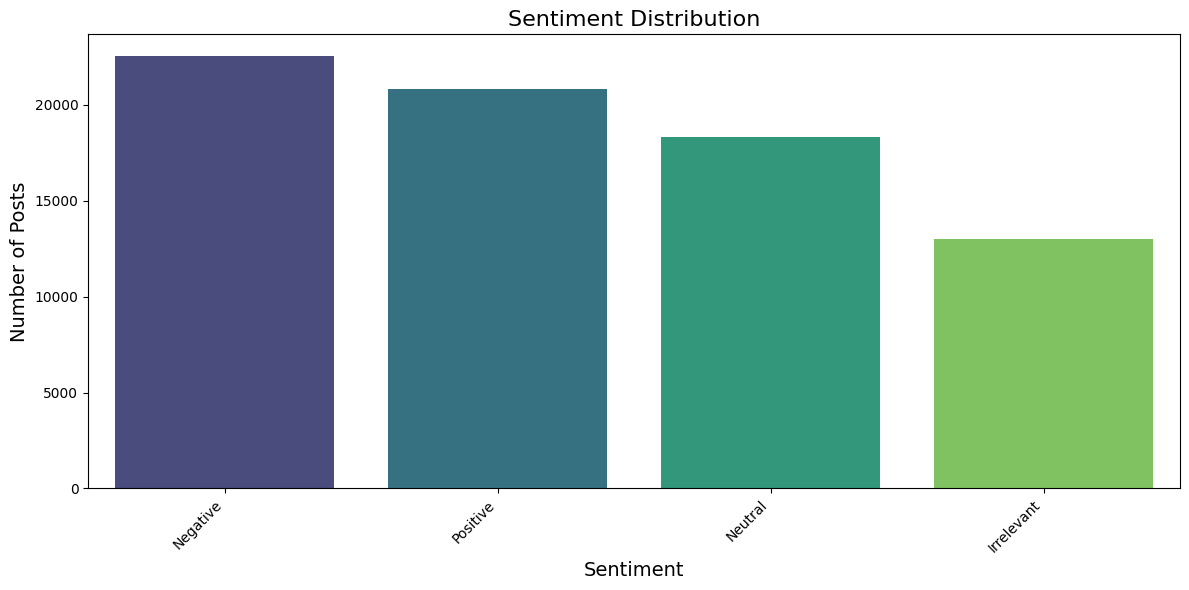

In [5]:
sentiment_counts = data_df['sentiment'].value_counts()
print(sentiment_counts)
plt.figure(figsize=(12, 6))
sns.barplot(x = sentiment_counts.index, y= sentiment_counts.values, palette="viridis")
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## initial cleaning test

In [6]:
import re
def clean_text(text):
    if isinstance(text, str):  # Check if the input is a string
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        # Remove mentions (@username)
        text = re.sub(r'@\w+', '', text)
        # Remove numbers
        text = re.sub(r'\d+', '', text)
        # Remove special characters (optional, if not already done)
        text = re.sub(r'[^\w\s]', '', text)
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    else:
        return ""  # Return an empty string for non-string inputs

data_df['text'] = data_df['text'].apply(clean_text)

print(data_df['text'].head(10))

0    im getting on borderlands and i will murder yo...
1    I am coming to the borders and I will kill you...
2    im getting on borderlands and i will kill you all
3    im coming on borderlands and i will murder you...
4    im getting on borderlands and i will murder yo...
5    im getting into borderlands and i can murder y...
6    So I spent a few hours making something for fu...
7    So I spent a couple of hours doing something f...
8    So I spent a few hours doing something for fun...
9    So I spent a few hours making something for fu...
Name: text, dtype: object


# Removing Null or empty Values

In [7]:
# Step 3: Remove rows where 'text, sentiment, platform' is empty or null
data_df = data_df[data_df['text'].str.strip().astype(bool)]
data_df = data_df[data_df['sentiment'].str.strip().astype(bool)]
data_df = data_df[data_df['platform'].str.strip().astype(bool)]
data_df = data_df.dropna(subset=['text'])
print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 73649 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         73649 non-null  int64 
 1   platform   73649 non-null  object
 2   sentiment  73649 non-null  object
 3   text       73649 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB
None


sentiment
Negative      22259
Positive      20587
Neutral       17988
Irrelevant    12815
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_3340\2939060013.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = sentiment_counts.index, y= sentiment_counts.values, palette="viridis")


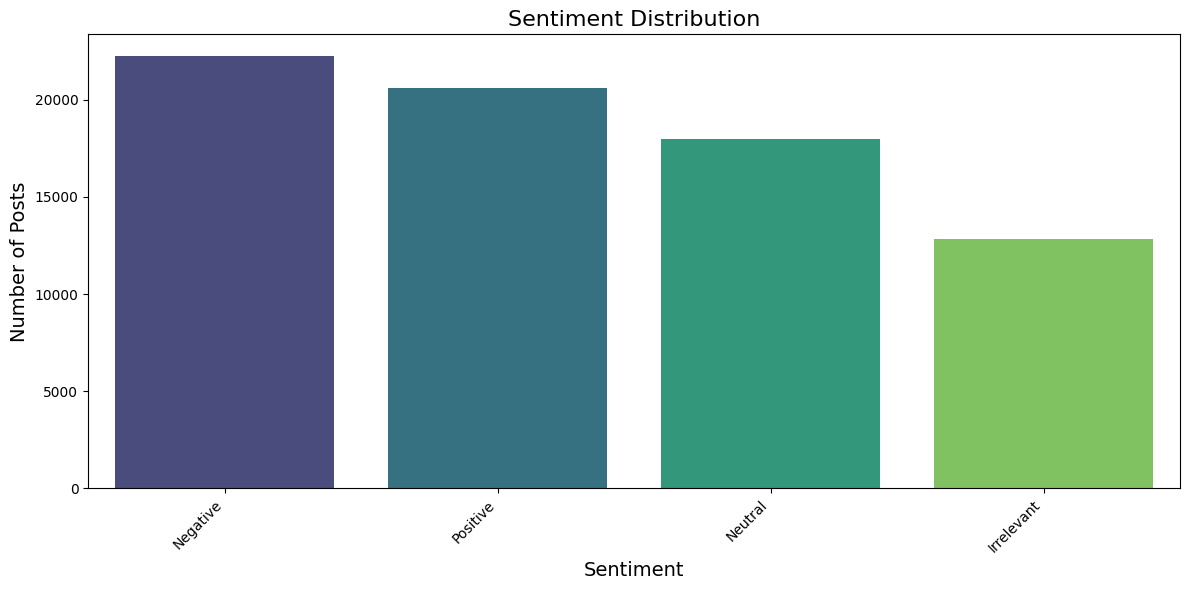

In [8]:
sentiment_counts = data_df['sentiment'].value_counts()
print(sentiment_counts)
plt.figure(figsize=(12, 6))
sns.barplot(x = sentiment_counts.index, y= sentiment_counts.values, palette="viridis")
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Lower case normalization

In [9]:
data_df['text'] = data_df['text'].str.lower()

## Stopword Removal

In [10]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
data_df['text'] = data_df['text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
print(data_df['text'].head(10))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                        im getting borderlands murder
1                                  coming borders kill
2                          im getting borderlands kill
3                         im coming borderlands murder
4                        im getting borderlands murder
5                        im getting borderlands murder
6    spent hours making something fun dont know hug...
7    spent couple hours something fun dont know im ...
8    spent hours something fun dont know im huge bo...
9    spent hours making something fun dont know hug...
Name: text, dtype: object


## Stemming

In [11]:
from nltk.stem import PorterStemmer
nltk.download('punkt')  # To download the tokenizer

# Initialize the stemmer
stemmer = PorterStemmer()

# Apply stemming to the 'text' column
data_df['text'] = data_df['text'].apply(lambda x: ' '.join(stemmer.stem(word) for word in x.split()))
print(data_df['text'].head(10))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0                             im get borderland murder
1                                     come border kill
2                               im get borderland kill
3                            im come borderland murder
4                             im get borderland murder
5                             im get borderland murder
6    spent hour make someth fun dont know huge fan ...
7    spent coupl hour someth fun dont know im huge ...
8    spent hour someth fun dont know im huge border...
9    spent hour make someth fun dont know huge rhan...
Name: text, dtype: object


## Lemmatization

In [12]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

data_df['text'] = data_df['text'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split()))
print(data_df['text'].head(10))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0                             im get borderland murder
1                                     come border kill
2                               im get borderland kill
3                            im come borderland murder
4                             im get borderland murder
5                             im get borderland murder
6    spent hour make someth fun dont know huge fan ...
7    spent coupl hour someth fun dont know im huge ...
8    spent hour someth fun dont know im huge border...
9    spent hour make someth fun dont know huge rhan...
Name: text, dtype: object


## imojis conversion

In [13]:
import emoji
data_df['text'] = data_df['text'].apply(emoji.demojize)

## Combined data

In [14]:
data_df['combined_text'] = data_df['platform'].str.lower() + ' ' + data_df['text']
filtered_df = data_df[['combined_text', 'sentiment']]
print(filtered_df['combined_text'].head())

0     borderlands im get borderland murder
1             borderlands come border kill
2       borderlands im get borderland kill
3    borderlands im come borderland murder
4     borderlands im get borderland murder
Name: combined_text, dtype: object


## Tokenization

In [15]:
from nltk.tokenize import word_tokenize

# Ensure 'punkt' is downloaded
nltk.download('punkt')
nltk.download('punkt_tab')

filtered_df['tokens'] = filtered_df['combined_text'].apply(word_tokenize)
print(filtered_df[['combined_text', 'tokens']].head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                           combined_text  \
0   borderlands im get borderland murder   
1           borderlands come border kill   
2     borderlands im get borderland kill   
3  borderlands im come borderland murder   
4   borderlands im get borderland murder   

                                        tokens  
0   [borderlands, im, get, borderland, murder]  
1            [borderlands, come, border, kill]  
2     [borderlands, im, get, borderland, kill]  
3  [borderlands, im, come, borderland, murder]  
4   [borderlands, im, get, borderland, murder]  


C:\Users\user\AppData\Local\Temp\ipykernel_3340\3569976956.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['tokens'] = filtered_df['combined_text'].apply(word_tokenize)


## Vectorization

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features
tfidf_matrix = vectorizer.fit_transform(filtered_df['combined_text'])
print(tfidf_matrix.shape)  # (num_samples, num_features)

(73649, 5000)


## Split the Data

In [17]:
from sklearn.model_selection import train_test_split

X = tfidf_matrix  # Feature matrix
y = filtered_df['sentiment']  # Target labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## LogisticRegression Model

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate on test data
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6794976238968092
              precision    recall  f1-score   support

  Irrelevant       0.64      0.53      0.58      2579
    Negative       0.71      0.76      0.73      4447
     Neutral       0.66      0.64      0.65      3627
    Positive       0.68      0.72      0.70      4077

    accuracy                           0.68     14730
   macro avg       0.67      0.66      0.67     14730
weighted avg       0.68      0.68      0.68     14730



## Naive_bayes MultinomialNB model

In [19]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluate on test data
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6429056347589952
              precision    recall  f1-score   support

  Irrelevant       0.71      0.39      0.50      2579
    Negative       0.65      0.77      0.71      4447
     Neutral       0.67      0.55      0.60      3627
    Positive       0.60      0.75      0.67      4077

    accuracy                           0.64     14730
   macro avg       0.66      0.61      0.62     14730
weighted avg       0.65      0.64      0.63     14730



## SVM LinearSVC model

In [20]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(X_train, y_train)

# Evaluate on test data
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7156822810590632
              precision    recall  f1-score   support

  Irrelevant       0.71      0.59      0.64      2579
    Negative       0.74      0.78      0.76      4447
     Neutral       0.70      0.67      0.69      3627
    Positive       0.71      0.76      0.73      4077

    accuracy                           0.72     14730
   macro avg       0.71      0.70      0.71     14730
weighted avg       0.72      0.72      0.71     14730



## RandomForestClassifier Model

In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f"Random Forest Accuracy: {accuracy}")

Random Forest Accuracy: 0.9196198234894772


In [22]:
import joblib
# joblib.dump(model, 'sentiment_model.pkl')
